## Introduction
<font color=#FF0000>First of all, PLEASE MAKE A COPY TO YOUR DRIVE.</font>

The deadline is 2022 / 5 / 6 12:00:00</br>
The total score is 120, any score more than 100 will be seen as 100.

Below is the image will be used in task1 and task2.

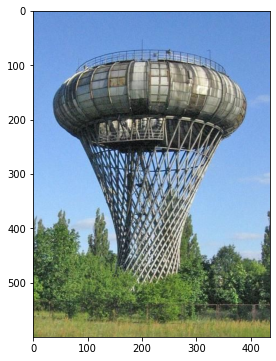

Image.shape:  (600, 435, 3)


In [2]:
#init program.
from IPython.display import display
from PIL import Image
from  matplotlib import pyplot as plt
import cv2
import numpy as np
import urllib.request
import math
from tqdm import trange

img_src = "https://i.imgur.com/RiFfgIR.jpeg" 
resp = urllib.request.urlopen(img_src)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
cv_image = cv2.imdecode(image, cv2.IMREAD_COLOR)
plt_image = cv_image[:,:,::-1]
plt.figure(figsize=(8, 6))
plt.imshow(plt_image)
plt.show()
print('Image.shape: ', plt_image.shape)

#Task1 - Image Processing - Darken (15%)
make the pixel's value decrease by 128

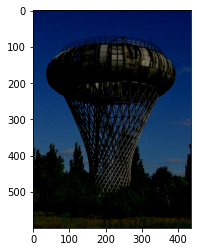

In [3]:
#make your Darken function here.
def Darken(image, intensity=128):
  """Fill your code"""
  darken_image = image.copy()
  darken_image[image < intensity] = 0
  darken_image[image >= intensity] -= intensity
  return darken_image

darken_image = Darken(plt_image)
plt.imshow(darken_image)
plt.show()

#Task2 - Anti-aliasing Downsampling (25%) 
Downsampling the image provided below to quarter-size resolution image. Note that "Anti-aliasing" technique is requierd if image aliasing occurred. Using gaussian filter pre-processing as the "Anti-aliasing" technique.

<font color=#FF0000><center><- Original image , Downsampled  image with aliasing -></center></font>
<p align="center">
<img src="https://i.imgur.com/1wW9Wbn.png">
</p>


100%|██████████| 596/596 [00:28<00:00, 21.21it/s]


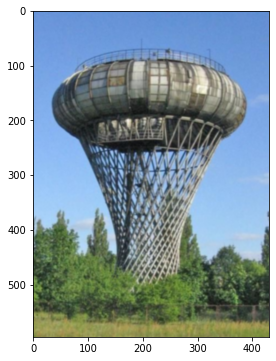

In [4]:
#make your Gaussian filter here.
KernalSize = 5 #change kernal size or sigma if needed.
def GaussiaFilter(KernelSize, image, sigma=1):
  """Fill your code"""
  row, col, depth = image.shape

  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  ###########以下是新增的部分###########
  center = KernelSize//2
  constant = 1/(2*math.pi*sigma**2)
  ###########以上是新增的部分###########
  for i in range(0,KernelSize):
    Filter_list = []
    ###########以下是新增的部分###########
    x = i - center
    ###########以上是新增的部分###########
    for j in range(0,KernelSize):
        #高斯函數公式
        # -------------- To do ----------------- #
        y = j - center
        kernel_value = constant * math.exp(-1*(x**2+y**2)/(2*sigma**2))
        Filter_list.append(kernel_value)
        total += kernel_value
        
    Gaussian+= [Filter_list]
  
  Kernel = np.array(Gaussian)/total

  resx=np.zeros((row-KernelSize+1,
                 col-KernelSize+1,
                 depth), dtype=np.uint8) #initial a result image
  padimg = image

  for h in trange(row-KernelSize+1):
    for w in range(col-KernelSize+1):
      for c in range(depth):
        v = np.sum(image[h:h+KernelSize, w:w+KernelSize, c]*Kernel)
        resx[h, w, c] = np.clip(v, 0, 255)
  return resx

gaussianImage = GaussiaFilter(KernalSize, plt_image, sigma=1)
plt.figure(figsize=(8, 6))
plt.imshow(gaussianImage)
plt.show()

In [ ]:
#make your Downsampling function here.
samplingScale = 0.25 #change samplingScale if needed.
def DownSamplingFunction(filted_image, samplingScale):
  """Fill your code"""
  
  return downsampled_image

downImage = DownSamplingFunction(gaussianImage, samplingScale)
plt.figure(figsize=(8, 6))
plt.imshow(downImage)
plt.show()

100%|██████████| 596/596 [00:27<00:00, 21.55it/s]


NameError: ignored

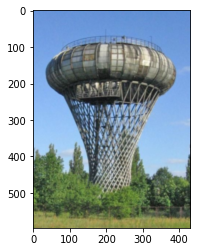

In [5]:
#show your result image here.
#both "only gaussian filtered image" and "final image"
filted_image = GaussiaFilter(KernalSize, plt_image)
plt.imshow(filted_image)

downsampled_image = DownSamplingFunction(filted_image, samplingScale)
plt.imshow(downsampled_image)

plt.show() 

#Task3 - Image Classification with CNN (80%)
Training 3 CNN models separately to recongize 
1. model-1: hand-writing numbers with provieded "mnist" dataset.
2. model-2: hand-drawing patterns with provieded part of the "quickdraw_bitmap" dataset.
3. model-3: determing whether the image is a number or a pattern with provieded datasets.

* The two datasets are both grayscale and having image size being 28 * 28
* You can briefly browse the dataset here: [mnist](http://yann.lecun.com/exdb/mnist/), [quickdraw_bitmap](https://github.com/googlecreativelab/quickdraw-dataset)

<font color=#FF0000>The higher accuracy, the higher score</font>

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout ,BatchNormalization, GlobalAveragePooling2D, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical ## used to one-hot your label
from sklearn.model_selection import train_test_split
import urllib.request

### 1. Training a model against mnist dataset (25%)
Goal for test accuracy: 80% $\uparrow$

11501568/11490434 [==============================] - 0s 0us/step
mnistTrainImage:  (60000, 28, 28)
mnistTrainLabel:  (60000, 10)
mnistTestImage:  (10000, 28, 28)
mnistTestLabel:  (10000, 10)


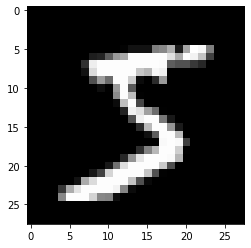

In [7]:
(mnistTrainImage, mnistTrainLabel), (mnistTestImage, mnistTestLabel) = load_data()
mnistTrainLabel = to_categorical(mnistTrainLabel) ## one-hot
mnistTestLabel = to_categorical(mnistTestLabel) ## one-hot
print('mnistTrainImage: ', mnistTrainImage.shape)
print('mnistTrainLabel: ', mnistTrainLabel.shape)
print('mnistTestImage: ', mnistTestImage.shape)
print('mnistTestLabel: ', mnistTestLabel.shape)

plt.imshow(mnistTrainImage[0], cmap = 'gray')
plt.show()

In [8]:
num_classes = mnistTrainLabel.shape[1]

In [9]:
#Do other image/data preprocessing here if needed.
"""Fill your code"""

img_rows, img_cols = mnistTrainImage.shape[1:3]
mnistTrainImage = mnistTrainImage.reshape(mnistTrainImage.shape[0], img_rows, img_cols, 1)
mnistTestImage = mnistTestImage.reshape(mnistTestImage.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [10]:
#Build CNN model here, modify if needed.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(mnistTrainImage, mnistTrainLabel ,
                    batch_size=32,
                    epochs=200,callbacks=[callback, model_checkpoint_callback],
                    verbose=1, validation_split=0.1)
model.load_weights(checkpoint_filepath)
model.evaluate(mnistTestImage, mnistTestLabel)

Epoch 1/200
1688/1688 [==============================] - 26s 10ms/step - loss: 0.4801 - accuracy: 0.8938 - val_loss: 0.0631 - val_accuracy: 0.9827
Epoch 2/200
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1505 - accuracy: 0.9561 - val_loss: 0.0609 - val_accuracy: 0.9837
Epoch 3/200
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1202 - accuracy: 0.9653 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 4/200
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0958 - accuracy: 0.9717 - val_loss: 0.0629 - val_accuracy: 0.9815
Epoch 5/200
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0854 - accuracy: 0.9746 - val_loss: 0.0469 - val_accuracy: 0.9882
Epoch 6/200
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0779 - accuracy: 0.9773 - val_loss: 0.0437 - val_accuracy: 0.9890
Epoch 7/200
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0666 - accuracy: 0.9795 - val_loss: 0

[0.04212090000510216, 0.9890999794006348]

### 2. Training a model against quickdraw_bitmap dataset (25%)
We only use five classes in this training, below is a function helping you to download the dataset.</br>
Goal for test accuracy: 90% $\uparrow$

In [11]:
## you don't have to change this cell's code, it is used to generate pre-setting data for you.
classes = ['airplane', 'alarm_clock', 'baseball', 'book', 'cup'] # with respect to label 0 to 4
for c in classes:
  if not os.path.exists('/content/' + c + '.npy'):
      with open('/content/' + c + '.npy', 'w'): pass

def download(testSplit = 0.2, maxItemPerClass = 5000):
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

  x = np.empty([1, 28, 28])
  y = np.empty([0])
  labelCounter = 0

  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, '/content/'+c+'.npy')
    load_url = '/content/'+c+'.npy'
    data = np.load(load_url)
    data = data[0: maxItemPerClass, :].reshape(-1, 28, 28)
    labels = np.full(data.shape[0], labelCounter)
    x = np.concatenate((x, data), axis=0)
    y = np.append(y, labels)
    labelCounter += 1
  x = x[1:, :, :]

  (quickdrawTrainImage, quickdrawTestImage, quickdrawTrainLabel, quickdrawTestLabel) = train_test_split(x, y, test_size = testSplit, random_state = 42)
  quickdrawTrainLabel = to_categorical(quickdrawTrainLabel)
  quickdrawTestLabel = to_categorical(quickdrawTestLabel)

  return quickdrawTrainImage, quickdrawTestImage, quickdrawTrainLabel, quickdrawTestLabel

## the label you get here is already in one-hot form
quickdrawTrainImage, quickdrawTestImage, quickdrawTrainLabel, quickdrawTestLabel = download(testSplit = 0.2, maxItemPerClass = 5000)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cup.npy


quickdrawTrainImage:  (20000, 28, 28)
quickdrawTrainLabel:  (20000, 5)
quickdrawTestImage:  (5000, 28, 28)
quickdrawTestLabel:  (5000, 5)


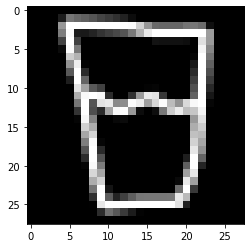

In [12]:
plt.imshow(quickdrawTrainImage[0, :, :], cmap = 'gray')
print('quickdrawTrainImage: ', quickdrawTrainImage.shape)
print('quickdrawTrainLabel: ', quickdrawTrainLabel.shape)
print('quickdrawTestImage: ', quickdrawTestImage.shape)
print('quickdrawTestLabel: ', quickdrawTestLabel.shape)

In [14]:
img_rows, img_cols = quickdrawTrainImage.shape[1:3]
quickdrawTrainImage = quickdrawTrainImage.reshape(quickdrawTrainImage.shape[0], img_rows, img_cols, 1)
quickdrawTestImage = quickdrawTestImage.reshape(quickdrawTestImage.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])
history = model2.fit(quickdrawTrainImage, quickdrawTrainLabel ,
                    batch_size=32,
                    epochs=200,callbacks=[callback, model_checkpoint_callback],
                    verbose=1, validation_split=0.1)
model2.load_weights(checkpoint_filepath)
model2.evaluate(quickdrawTestImage, quickdrawTestLabel)

Epoch 1/200
563/563 [==============================] - 7s 10ms/step - loss: 1.1840 - accuracy: 0.7673 - val_loss: 0.3540 - val_accuracy: 0.8785
Epoch 2/200
563/563 [==============================] - 6s 10ms/step - loss: 0.4026 - accuracy: 0.8612 - val_loss: 0.2835 - val_accuracy: 0.9030
Epoch 3/200
563/563 [==============================] - 6s 10ms/step - loss: 0.3269 - accuracy: 0.8846 - val_loss: 0.2805 - val_accuracy: 0.9045
Epoch 4/200
563/563 [==============================] - 6s 10ms/step - loss: 0.2820 - accuracy: 0.9004 - val_loss: 0.2553 - val_accuracy: 0.9120
Epoch 5/200
563/563 [==============================] - 5s 10ms/step - loss: 0.2465 - accuracy: 0.9135 - val_loss: 0.2468 - val_accuracy: 0.9095
Epoch 6/200
563/563 [==============================] - 6s 10ms/step - loss: 0.2217 - accuracy: 0.9216 - val_loss: 0.2585 - val_accuracy: 0.9035
Epoch 7/200
563/563 [==============================] - 5s 10ms/step - loss: 0.2023 - accuracy: 0.9291 - val_loss: 0.2544 - val_accuracy:

[0.2170633226633072, 0.9358000159263611]

### 3. Training a model against merged dataset (30%) 
You may use:
```
keras.utils.plot_model(model3, "model3.png", show_shapes=True)
```
Please **<font color=#FF0000>Concatenate trained model 1 and model 2 in the previous work</font>** as feature extractor (Non-trainable) and add a layers(trainable) to construct a new model.
![](https://i.imgur.com/2CL7zfy.png)
The new model will recognize whether the image is from mnist dataset or quickdraw_bitmap datasets. (Binary Classification Task)

### Data preprocessing:
1. Please concatenate two dataset for training and testing
2. Create new label 0: mnist, 1: quickdraw_bitmap
3. make the merged dataset balance

Goal for test accuracy : 90% $\uparrow$

In [51]:
model.eval

(20000, 28, 28, 1)

In [52]:
#Relabel and merge datasets here.
"""Fill your code"""
new_train_data = np.concatenate([mnistTrainImage, quickdrawTrainImage, quickdrawTrainImage, quickdrawTrainImage], 0)
new_train_label = np.array([0]*mnistTrainImage.shape[0]+[1]*quickdrawTrainImage.shape[0]*3)

new_test_data = np.concatenate([mnistTestImage, quickdrawTestImage, quickdrawTrainImage, quickdrawTrainImage], 0)[shuffle_idx_test]
new_test_label = np.array([0]*mnistTestImage.shape[0]+[1]*quickdrawTestImage.shape[0]*3)

In [53]:
#Do other image/data preprocessing here if needed.
"""Fill your code"""
shuffle_idx_train = np.arange(new_train_data.shape[0])
shuffle_idx_test = np.arange(mnistTestImage.shape[0]+quickdrawTestImage.shape[0])
np.random.shuffle(shuffle_idx_train)
np.random.shuffle(shuffle_idx_test)

new_train_data = new_train_data[shuffle_idx_train]
new_train_label = new_train_label[shuffle_idx_train]

new_test_data = new_test_data[shuffle_idx_test]
new_test_label = new_test_label[shuffle_idx_test]


In [ ]:
#Build CNN model here, modify if needed.
#Please concatenate model-1 and model-2
model.trainable = False
model2.trainable = False

input_for_two = keras.Input(shape=input_shape, name="input_for_two")
model1_out = model(input_for_two)
model2_out = model2(input_for_two)
con = layers.concatenate([model1_out, model2_out])
x = Flatten()(con)
x =  Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x =  Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x =  Dense(32, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

model3 = Model(inputs=input_for_two, outputs=out, name="model3")

model3.compile(loss=keras.losses.binary_crossentropy,
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model3.fit(new_train_data, new_train_label ,
                    batch_size=32,
                    epochs=200,
                    verbose=1, validation_split=0.1)

model3.load_weights(checkpoint_filepath)
model3.evaluate(new_test_data, new_test_label)

Epoch 1/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.3675 - accuracy: 0.8417 - val_loss: 0.1803 - val_accuracy: 0.9379
Epoch 2/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.2807 - accuracy: 0.8899 - val_loss: 0.1550 - val_accuracy: 0.9502
Epoch 3/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.2695 - accuracy: 0.8950 - val_loss: 0.1412 - val_accuracy: 0.9513
Epoch 4/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.2584 - accuracy: 0.8993 - val_loss: 0.1467 - val_accuracy: 0.9492
Epoch 5/200
3375/3375 [==============================] - 26s 8ms/step - loss: 0.2553 - accuracy: 0.9003 - val_loss: 0.1497 - val_accuracy: 0.9514
Epoch 6/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.2477 - accuracy: 0.9041 - val_loss: 0.1419 - val_accuracy: 0.9464
Epoch 7/200
3375/3375 [==============================] - 27s 8ms/step - loss: 0.2475 - accuracy: 0.9042 - val_loss: 0.1387 -

In [49]:
model2.evaluate(quickdrawTestImage, quickdrawTestLabel)

157/157 [==============================] - 1s 7ms/step - loss: 0.2171 - accuracy: 0.9358


[0.2170633226633072, 0.9358000159263611]